# The future of ML (Americans vs Indians)

Since I started Kaggle competitions, I had a cute question. I called it beginner's curiosity.   

**"Have you ever thought which countries have the biggest impact on Kaggle competition?"**  

As everybody knows, the USA is an obvious IT powerhouse with Silicon Valley. It has the largest number of Kaggle Grandmaster Champions. There is no doubt that the USA has the most influence on Kaggle competitions.  

You can also see a lot of Indians on the participants list of it. India, known as the rising IT powerhouse, it actually interested in the Kaggle competitions. It can be confirmed easily by checking a percentage of respondents to the 《2020 Kaggle Machine Learning & Data Science Survey》. The response rate for Indians is the highest about 29.2%(5,850 people). It is higher than the second-ranked country, and I will explain the details below.

Plus, a few years ago, every country emphasize the importance of Machine Learning. Because It can be used lots of fields in the world. I also wondered the future of ML, so I decided to look into the future of Machine Learning through responses from two leader countires.

**"Do you know the future of Machine Learning?"**

To sum up, I will compare the responses of American and Indian in the order below.  


## Contents
1. Responses Rate by Country
2. Percentage by age & gender
3. Level of Education
4. Development Environment
5. Basic of Machine Learning
6. CV vs NLP
7. Machine Learning in the business

## Library & Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import zipfile
DATA_IN_PATH = './data/'
file_list = ['kaggle-survey-2020.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [3]:
survey = pd.read_csv('./data/kaggle_survey_2020_responses.csv')
question = survey.iloc[0,:].T
full_data = survey.iloc[1:,:]

full_data[full_data.columns[3]].replace({'United States of America':'USA',
                                         'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

C:\Users\naeun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\naeun\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4]:
question.head()

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
Name: 0, dtype: object

In [5]:
full_data.head()

Time from Start to Finish (seconds)     Q1   Q2         Q3  \
1                                1838  35-39  Man   Colombia   
2                              289287  30-34  Man        USA   
3                                 860  35-39  Man  Argentina   
4                                 507  30-34  Man        USA   
5                                  78  30-34  Man      Japan   

                  Q4                 Q5           Q6 Q7_Part_1 Q7_Part_2  \
1    Doctoral degree            Student   5-10 years    Python         R   
2    Master’s degree      Data Engineer   5-10 years    Python         R   
3  Bachelor’s degree  Software Engineer  10-20 years       NaN       NaN   
4    Master’s degree     Data Scientist   5-10 years    Python       NaN   
5    Master’s degree  Software Engineer    3-5 years    Python       NaN   

  Q7_Part_3  ... Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4   Q35_B_Part_5  \
1       SQL  ...          NaN          NaN          NaN   TensorBoard    
2       SQL  ...          NaN          NaN          NaN            NaN   
3       NaN  ...          NaN          NaN          NaN            NaN   
4       SQL  ...          NaN          NaN          NaN            NaN   
5       NaN  ...          NaN          NaN          NaN            NaN   

  Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8 Q35_B_Part_9 Q35_B_Part_10  \
1          NaN          NaN          NaN          NaN           NaN   
2          NaN          NaN          NaN          NaN           NaN   
3          NaN          NaN          NaN          NaN          None   
4          NaN          NaN          NaN          NaN           NaN   
5          NaN          NaN          NaN          NaN           NaN   

  Q35_B_OTHER  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  

[5 rows x 355 columns]

## 1. Responses Rate by Country

The response rate for Indians is the highest about 29.2%(5,850 people). It is about 2.6 times higher than the second-ranked country, the USA.  

In [6]:
full_pie = px.pie(full_data, full_data.columns[3],
                 title='Survey Responses Rate by Country',
                 template='seaborn', hole=0.5)
full_pie.update_traces(textposition='inside', textinfo='percent+label')
full_pie.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
full_pie.show()

I just use Americans and Indians responses for this report, so I extract data by only 2 countries.

In [7]:
data = full_data[(full_data['Q3']=='India')|(full_data['Q3']=='USA')]
data = data.iloc[1:,:]
data.reset_index(drop=True, inplace=True)
data.shape

(8087, 355)

To organize the data neatly, I preprocesse a gender column. Only female and male remain. (146 responses will be deleted)

In [8]:
data = data[(data['Q2']=='Man')|(data['Q2']=='Woman')]
data = data.iloc[1:,:]
data.reset_index(drop=True, inplace=True)
data.shape

(7941, 355)

In [9]:
print("- Valid American Response: ",len(data[data['Q3']=='USA']))
print("- Valid Indian Response: ",len(data[data['Q3']=='India']))

- Valid American Response:  2161
- Valid Indian Response:  5780


Since difference of the number of respondents by 2 countries, I will compare all data with the response rate.

## 2. Percentage by age & gender



In [10]:
India = data[data['Q3']=='India']
India = India.iloc[1:,:]
India.reset_index(drop=True, inplace=True)
India.head()

Time from Start to Finish (seconds)     Q1     Q2     Q3                 Q4  \
0                                7469  18-21    Man  India  Bachelor’s degree   
1                                 413  18-21  Woman  India  Bachelor’s degree   
2                                 192  22-24    Man  India  Bachelor’s degree   
3                                 267  18-21    Man  India  Bachelor’s degree   
4                                3313  22-24  Woman  India    Doctoral degree   

             Q5         Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  ...  \
0       Student  1-2 years    Python         R       SQL  ...   
1       Student  1-2 years       NaN         R       SQL  ...   
2       Student  1-2 years    Python       NaN       SQL  ...   
3       Student  1-2 years    Python       NaN       NaN  ...   
4  Statistician  3-5 years       NaN         R       SQL  ...   

         Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4 Q35_B_Part_5 Q35_B_Part_6  \
0                 NaN          NaN          NaN          NaN          NaN   
1                 NaN          NaN          NaN          NaN          NaN   
2                 NaN          NaN          NaN          NaN          NaN   
3                 NaN          NaN          NaN          NaN          NaN   
4   Weights & Biases           NaN          NaN          NaN          NaN   

  Q35_B_Part_7 Q35_B_Part_8 Q35_B_Part_9 Q35_B_Part_10 Q35_B_OTHER  
0          NaN          NaN          NaN           NaN         NaN  
1          NaN          NaN          NaN          None         NaN  
2          NaN          NaN          NaN           NaN         NaN  
3          NaN          NaN          NaN           NaN         NaN  
4          NaN          NaN          NaN           NaN         NaN  

[5 rows x 355 columns]

In [11]:
USA = data[data['Q3']=='USA']
USA = USA.iloc[1:,:]
USA.reset_index(drop=True, inplace=True)
USA.head()

Time from Start to Finish (seconds)     Q1     Q2   Q3                 Q4  \
0                                 571  50-54    Man  USA    Master’s degree   
1                                 723  25-29  Woman  USA    Master’s degree   
2                               65598  50-54  Woman  USA  Bachelor’s degree   
3                                 340  30-34    Man  USA    Master’s degree   
4                                5811  35-39    Man  USA    Master’s degree   

                  Q5                         Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
0  Software Engineer                  20+ years    Python       NaN       NaN   
1            Student                  1-2 years    Python         R       NaN   
2              Other  I have never written code       NaN       NaN       NaN   
3            Student                  3-5 years    Python         R       SQL   
4              Other                  < 1 years       NaN       NaN       NaN   

   ...        Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4 Q35_B_Part_5  \
0  ...                 NaN          NaN          NaN          NaN   
1  ...   Weights & Biases           NaN          NaN          NaN   
2  ...                 NaN          NaN          NaN          NaN   
3  ...                 NaN          NaN          NaN          NaN   
4  ...                 NaN          NaN          NaN          NaN   

  Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8 Q35_B_Part_9 Q35_B_Part_10  \
0          NaN          NaN          NaN          NaN          None   
1          NaN          NaN          NaN          NaN           NaN   
2          NaN          NaN          NaN          NaN           NaN   
3          NaN          NaN          NaN          NaN          None   
4          NaN          NaN          NaN          NaN           NaN   

  Q35_B_OTHER  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 355 columns]

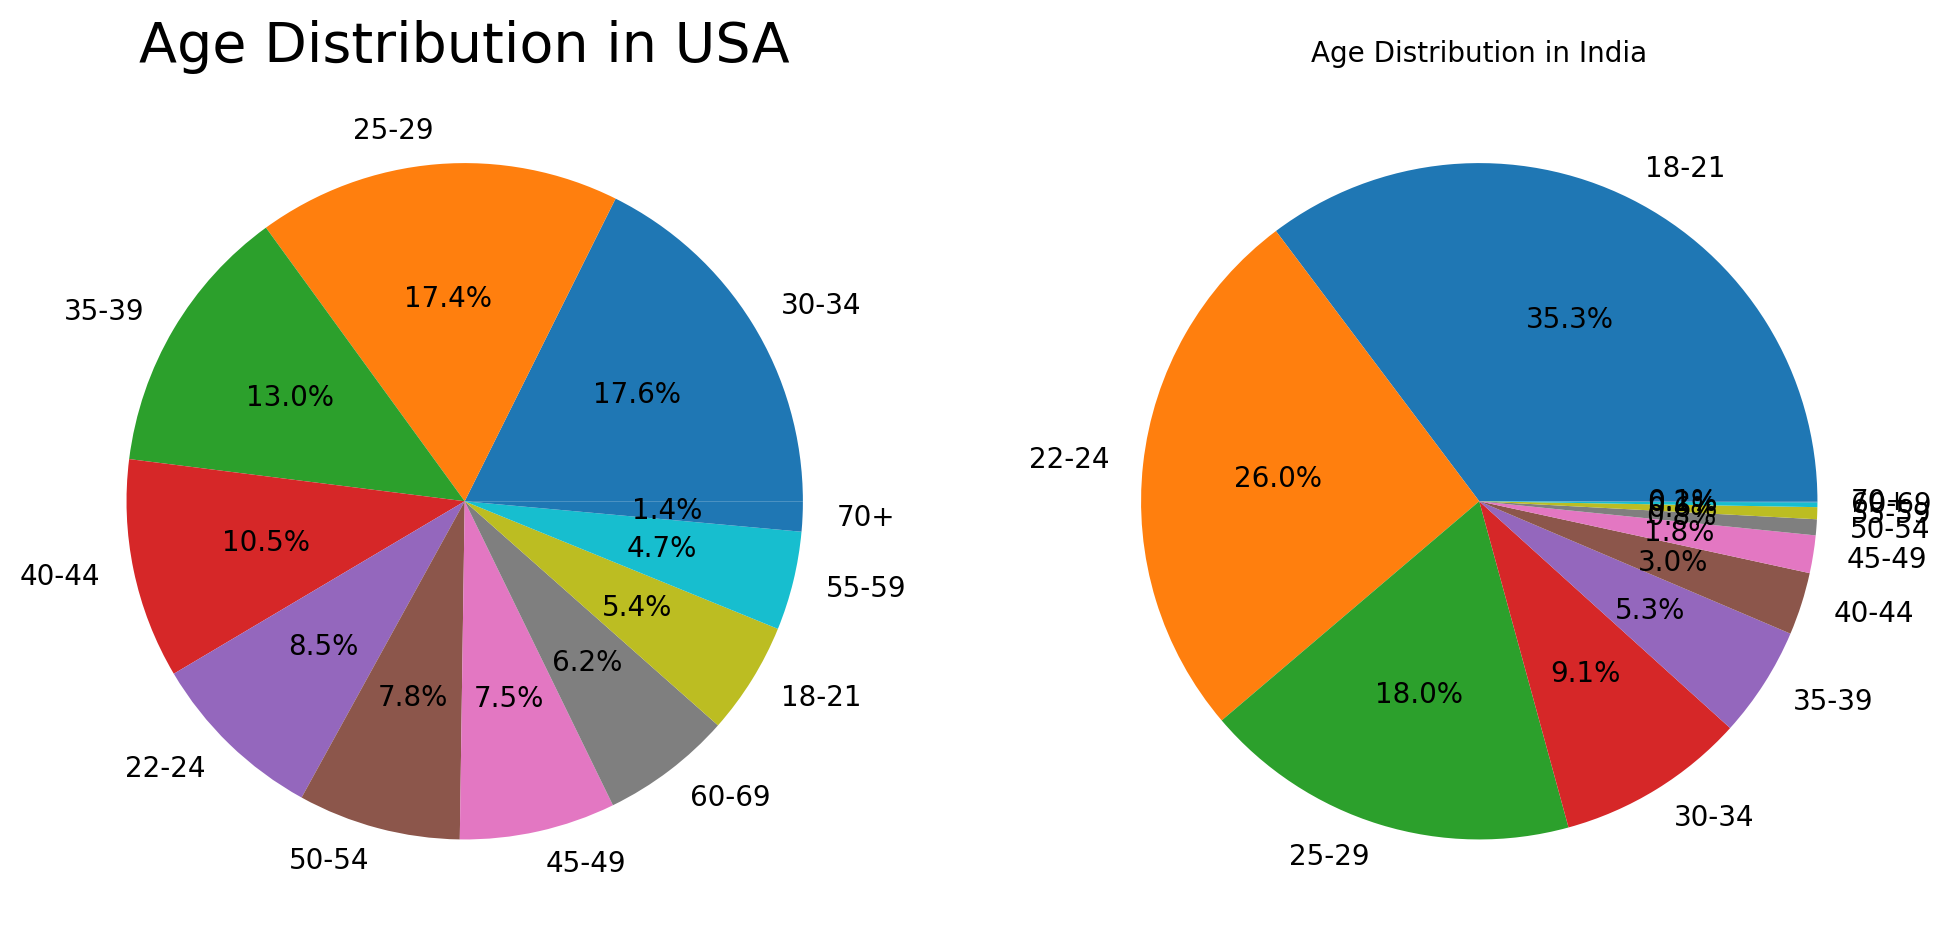

In [90]:
f, ax = plt.subplots(1, 2, figsize = (12, 8))

USA['Q1'].value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('Age Distribution in USA', fontsize=20)
ax[0].set_ylabel('')

India['Q1'].value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('Age Distribution in India', fontsize=20)
ax[1].set_ylabel('')
plt.show()

Age|USA|India
:---:|:---:|:---:
18-21|5.4%|35.3%
22-24|8.5%|26.0%
25-29|17.4%|18.0%
30-34|17.6%|9.1%
35-39|13.0%|5.3%
40-44|10.5%|3.0%
45-49|7.5%|1.8%
50-54|7.8%|0.8%
55-59|4.7%|0.6%
60-69|6.2%|0.2%
70+|1.4%|0.1%

You can notice easily in the USA, distribution of age group is more regular than India. It represents the cording fever especially among young Indian.

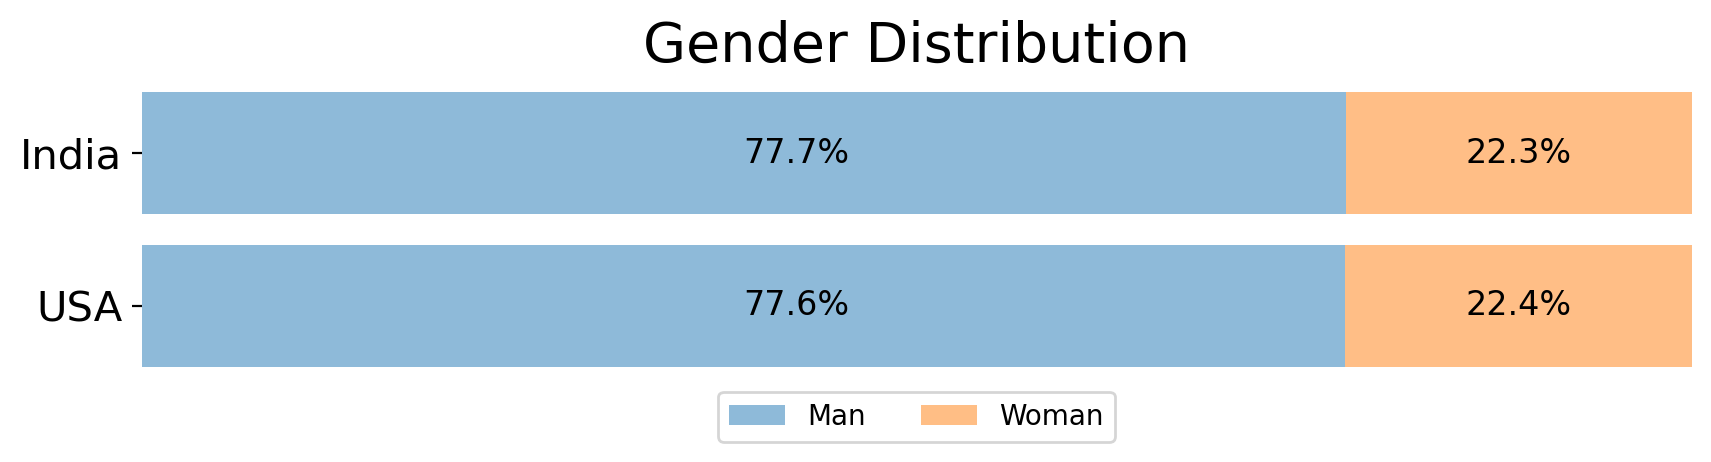

In [100]:
q3_order = data['Q3'].value_counts()[:11].index
data_q2q3 = data[['Q2','Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[q3_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Man','Woman']][::-1]

fig, ax = plt.subplots(1,1,figsize=(10, 2))

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], alpha=0.5, label='Man')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'],
        left=data_q2q3_ratio['Man'], alpha=0.5, label='Woman')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontsize=15)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Man'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]/2, i), fontsize=12, va='center')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]+data_q2q3_ratio['Woman'][i]/2, i),
                   va='center', ha='center', fontsize=12)
    
plt.title('Gender Distribution', fontsize=20)   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.25))
plt.show()

The gender raions of two countires are alike.

## 3. Level of Education

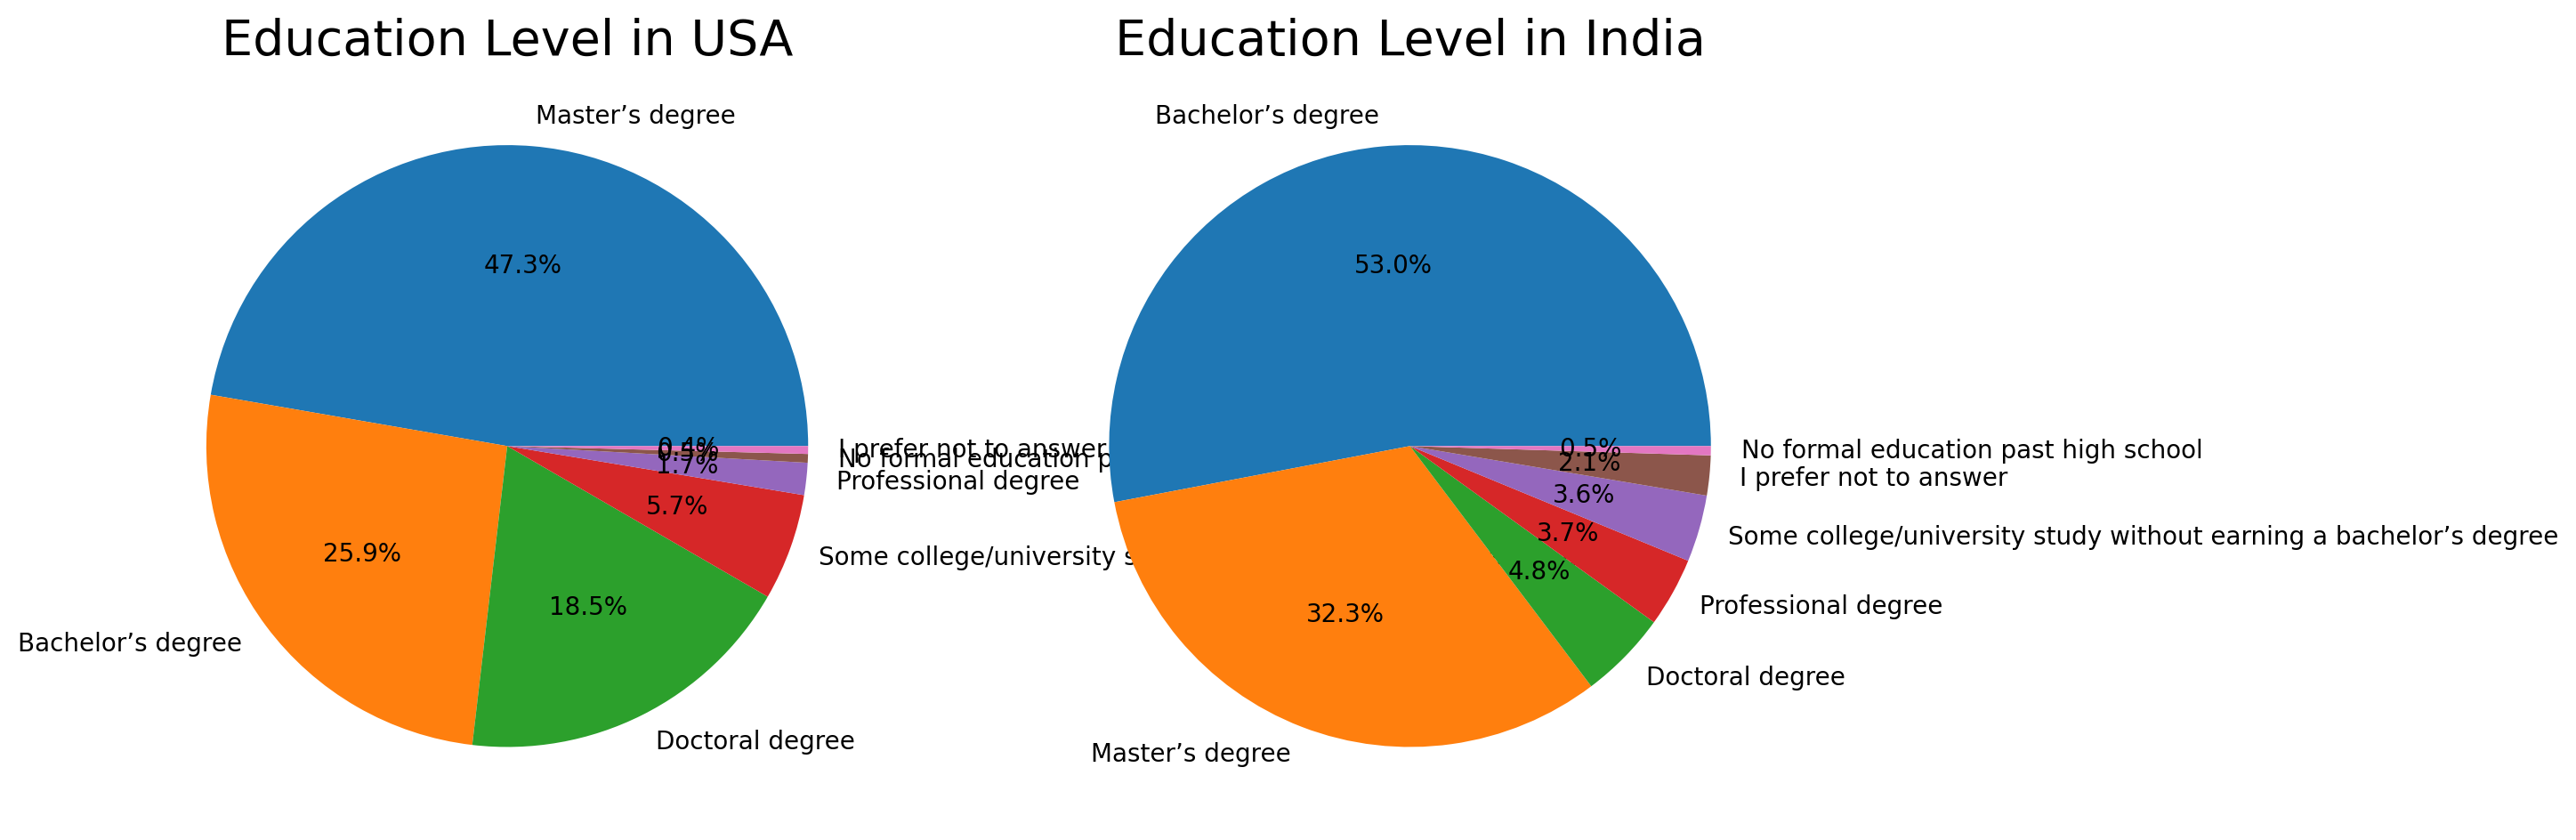

In [140]:
f, ax = plt.subplots(1, 2, figsize = (12, 8))

USA['Q4'].value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('Education Level in USA', fontsize=20)
ax[0].set_ylabel('')

India['Q4'].value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('Education Level in India', fontsize=20)
ax[1].set_ylabel('')
plt.show()

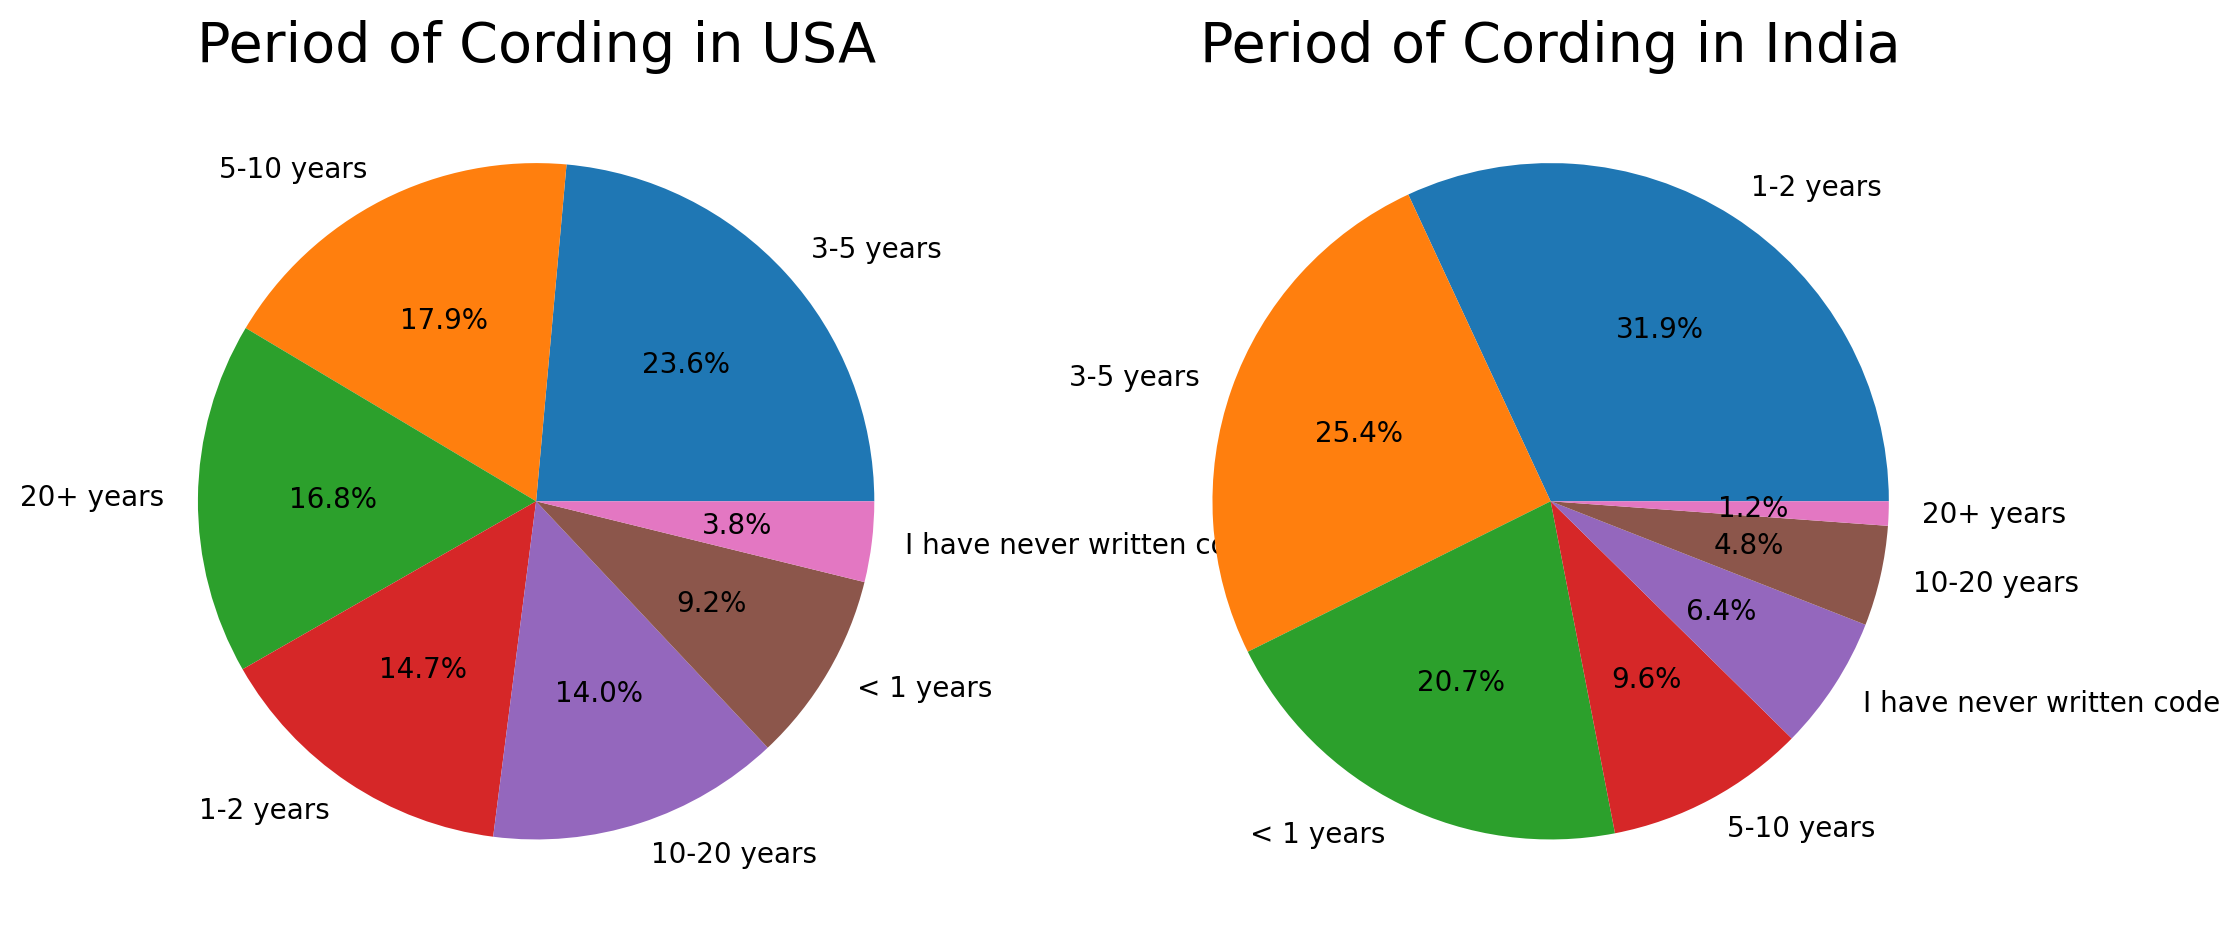

In [141]:
f, ax = plt.subplots(1, 2, figsize = (12, 8))

USA['Q6'].value_counts().plot.pie(autopct='%.1f%%', ax = ax[0])
ax[0].set_title('Period of Cording in USA', fontsize=20)
ax[0].set_ylabel('')

India['Q6'].value_counts().plot.pie(autopct='%.1f%%', ax = ax[1])
ax[1].set_title('Period of Cording in India', fontsize=20)
ax[1].set_ylabel('')
plt.show()

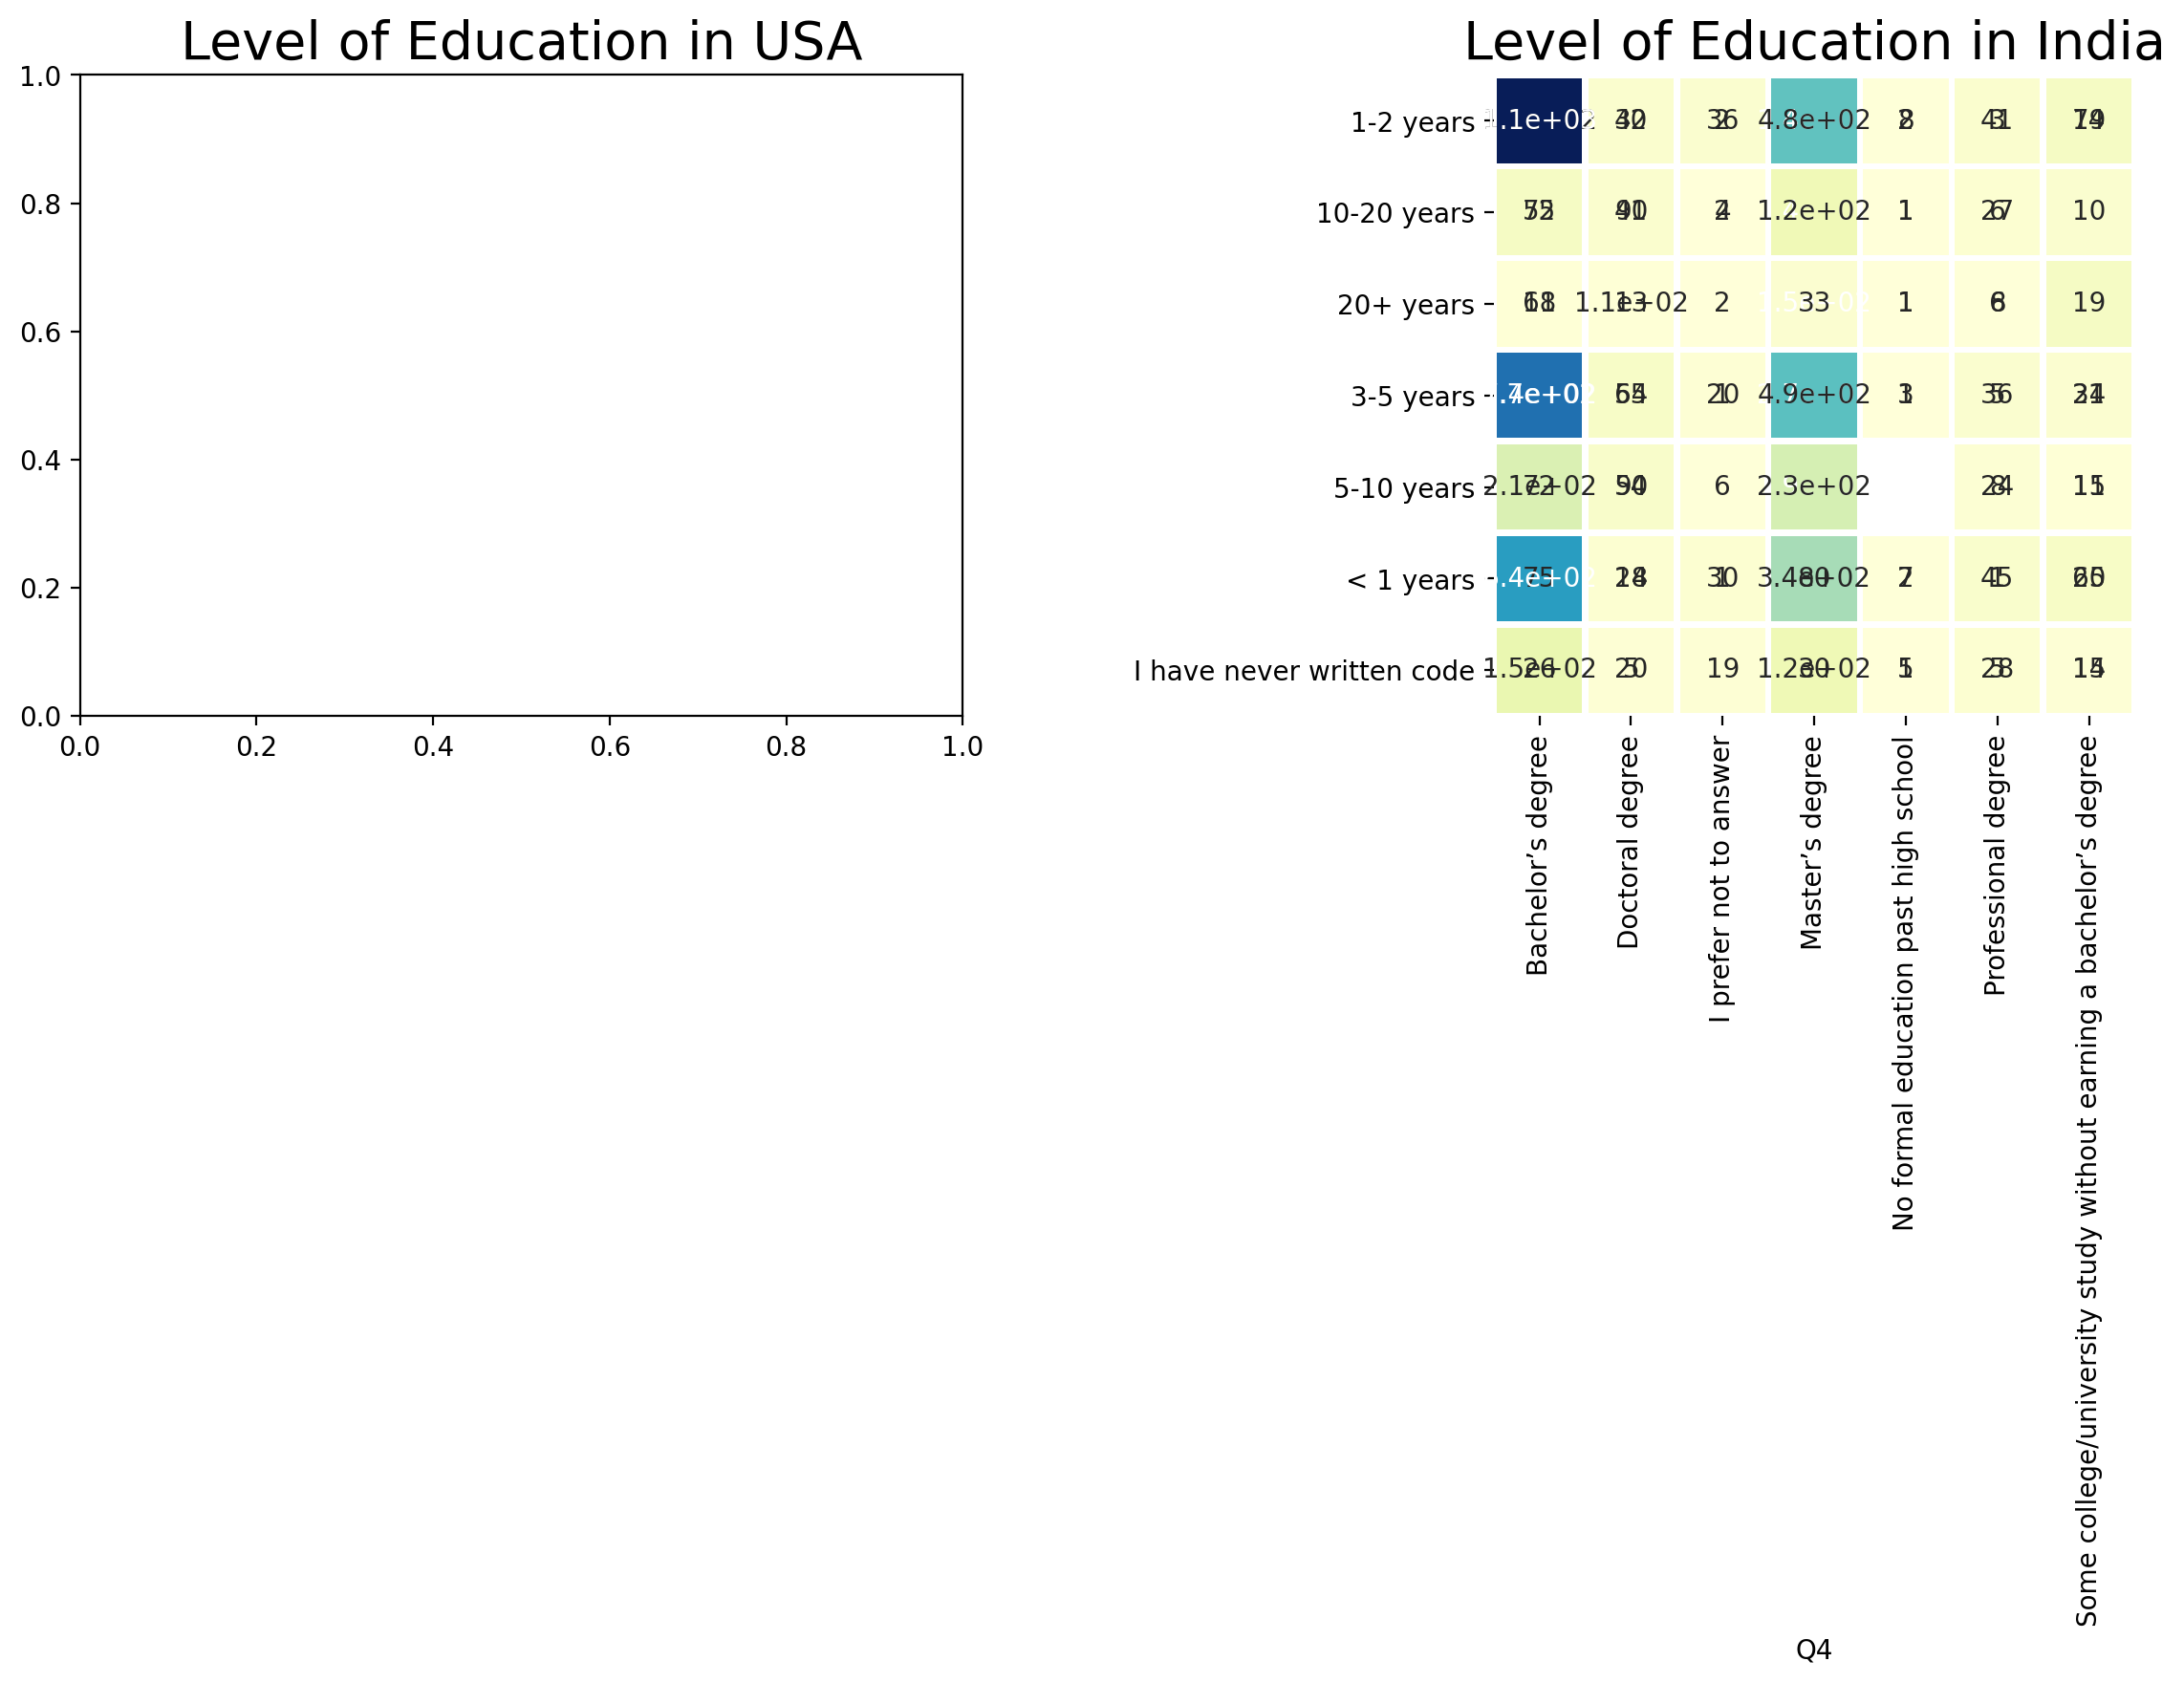

In [139]:
f, ax = plt.subplots(1, 2, figsize = (12, 8))

USA['count'] = 1
sns.heatmap(pd.pivot_table(USA, values='count', index=['Q6'], columns=['Q4'], aggfunc=np.sum), 
            cmap="YlGnBu",
            square=True, 
            linewidth=2, 
            cbar=False, 
            annot=True)
ax[0].set_title('Level of Education in USA', fontsize=20)
ax[0].set_ylabel('')

India['count'] = 1
sns.heatmap(pd.pivot_table(India, values='count', index=['Q6'], columns=['Q4'], aggfunc=np.sum), 
            cmap="YlGnBu",
            square=True, 
            linewidth=2, 
            cbar=False, 
            annot=True)
ax[1].set_title('Level of Education in India', fontsize=20)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 4. Development Environment

## 5. Basic of Machine Learning

## 6. CV vs NLP

## 7. Machine Learning in the business